In [128]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2

In [129]:
f = lambda t, a, om, phi, b: a * np.sin(om * t + phi) * np.exp(-b * t) #Function generator

In [130]:
time = np.linspace(0,3*np.pi,11) #Experiment where oscillation is measure 11 times
dataY = np.empty(11)

for i in range(0,11):
    dataY[i] = np.sin(time[i])*np.exp(-1*time[i]/10) + 0.4*np.random.rand() - 0.2 #Random sin data generator

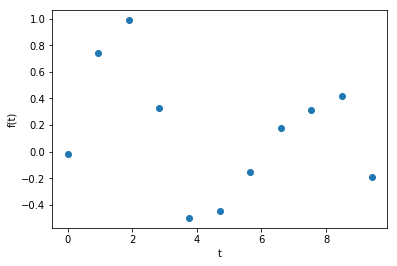

In [131]:
plt.plot(time, dataY, 'o')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.show()

In [132]:
fit = curve_fit(f, time, dataY, p0=[1.1, 1.1, 0.1, 0.2])[0] #Fitting function

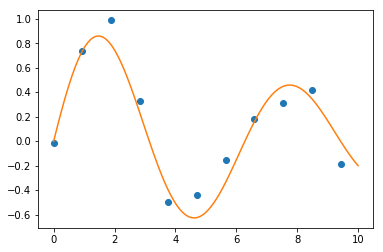

In [133]:
plt.plot(time, dataY, 'o')
t = np.linspace(0,10,100) #smoothens the curve
plt.plot(t, f(t, 1,1,0,0.1))
plt.show()

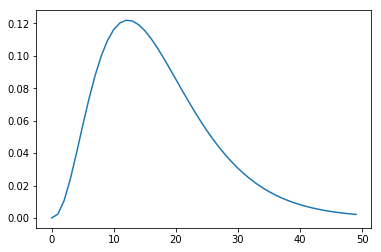

In [152]:
pdf = chi2.pdf(np.linspace(0,20),7)
plt.plot(pdf)

In [135]:
contour =  curve_fit(f, time, dataY, p0=[1.1, 1.1, 0.1, 0.2])[0]
sigma2 = 2./150 #expectation value of error
a1 = contour[0]
om1 = contour[1]
phi1 = contour[2]

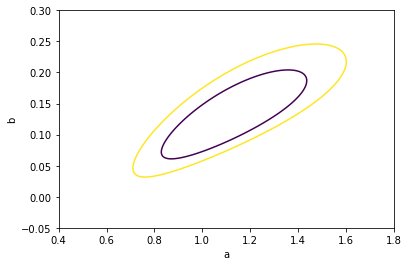

In [141]:
conta, contb = np.meshgrid(np.linspace(0.4,1.8,200),np.linspace(-0.05,0.3,200))
contour_chi2 = np.sum([(dataY[i]-f(time[i],conta, om1, phi1, contb))**2/sigma2 for i in range(len(time))], axis=0)
plt.contour(conta,contb,contour_chi2, levels=[20,25])
plt.xlabel('a')
plt.ylabel('b')
plt.show()

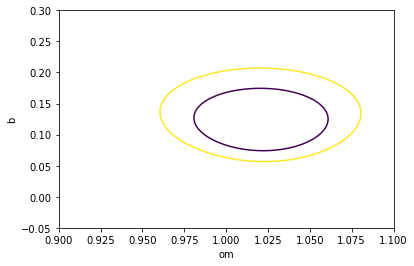

In [143]:
contom, contb1 = np.meshgrid(np.linspace(0.9,1.1,200),np.linspace(0,0.3,200))
contour_chi2 = np.sum([(dataY[i]-f(time[i],a1,contom,phi1,contb1))**2/sigma2 for i in range(len(time))], axis=0)
plt.contour(contom,contb,contour_chi2, levels=[20,25])
plt.xlabel('om')
plt.ylabel('b')
plt.show()

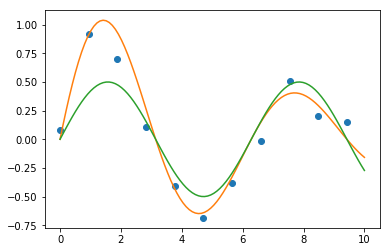

In [149]:
plt.plot(time, dataY, 'o')
plt.plot(t, f(t, 1.3, 1, 0, 0.15))
plt.plot(t, f(t, 0.5, 1, 0, 0))
plt.show()

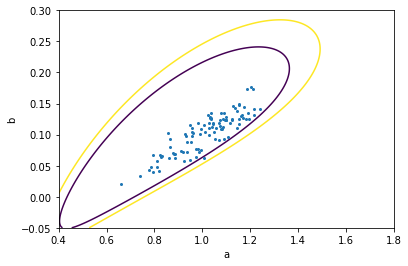

In [147]:
conta, contb = np.meshgrid(np.linspace(0.4,1.8,200),np.linspace(-0.05,0.3,200))
contour_chi2 = np.sum([(dataY[i]-f(time[i],conta, om1, phi1, contb))**2/sigma2 for i in range(len(time))], axis=0)
plt.contour(conta,contb,contour_chi2, levels=[20,25])
aval = []
bval = []
for i in range(0,100):
    time = np.linspace(0,3*np.pi,11)
    dataY = np.empty(11)
    for i in range(0,11):
        dataY[i] = np.sin(time[i])*np.exp(-1*time[i]/10) + 0.4*np.random.rand() - 0.2
    fit = curve_fit(f, time, dataY, p0=[1, 1, 0, 0.1])[0]
    aval.append(fit[0])
    bval.append(fit[3])
plt.plot(aval, bval, 'o', ms = 2)
plt.xlabel('a')
plt.ylabel('b')

plt.show()